<a href="https://colab.research.google.com/github/xjlponce/fastai-fishnets/blob/main/FastAi_Nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Create folder and unzip file**

In [ ]:
!cd drive
!mkdir "/content/Dataset"
!unzip "/content/drive/MyDrive/Dataset/net.zip" -d "/content/Dataset"

Archive:  /content/drive/MyDrive/Dataset/net.zip
   creating: /content/Dataset/nets/
   creating: /content/Dataset/nets/no holes/
  inflating: /content/Dataset/nets/no holes/net01.jpg  
  inflating: /content/Dataset/nets/no holes/net02.jpg  
  inflating: /content/Dataset/nets/no holes/net03.jpg  
  inflating: /content/Dataset/nets/no holes/net04.jpg  
  inflating: /content/Dataset/nets/no holes/net05.jpg  
  inflating: /content/Dataset/nets/no holes/net06.jpg  
  inflating: /content/Dataset/nets/no holes/net07.jpg  
  inflating: /content/Dataset/nets/no holes/net08.jpg  
  inflating: /content/Dataset/nets/no holes/net09.jpg  
  inflating: /content/Dataset/nets/no holes/net10.jpg  
  inflating: /content/Dataset/nets/no holes/net11.jpg  
  inflating: /content/Dataset/nets/no holes/net12.jpg  
  inflating: /content/Dataset/nets/no holes/net13.jpg  
  inflating: /content/Dataset/nets/no holes/net14.jpg  
  inflating: /content/Dataset/nets/no holes/net15.jpg  
  inflating: /content/Dataset/

**Install fastai to your colab workspace**

In [ ]:
!pip install -Uqq fastbook

     |████████████████████████████████| 719 kB 28.5 MB/s 
     |████████████████████████████████| 1.2 MB 49.0 MB/s 
     |████████████████████████████████| 4.7 MB 55.7 MB/s 
     |████████████████████████████████| 365 kB 66.1 MB/s 
     |████████████████████████████████| 101 kB 11.9 MB/s 
     |████████████████████████████████| 212 kB 69.5 MB/s 
     |████████████████████████████████| 141 kB 64.2 MB/s 
     |████████████████████████████████| 115 kB 58.6 MB/s 
     |████████████████████████████████| 596 kB 44.9 MB/s 
     |████████████████████████████████| 127 kB 66.3 MB/s 
     |████████████████████████████████| 6.6 MB 53.5 MB/s 


**Function and Classes**

In [ ]:
import fastbook
from fastbook import *
from fastai.vision.all import *

from fastai.vision.widgets import *
from fastbook import load_learner

**Dataset path**

In [ ]:
path= Path("/content/Dataset/nets")
Path.BASE_PATH=path
path.ls()

(#2) [Path('no holes'),Path('with holes')]

**Checking file path**

In [ ]:
file_path = get_image_files(path)

In [ ]:
file_path

(#50) [Path('no holes/net17.jpg'),Path('no holes/net23.jpg'),Path('no holes/net21.jpg'),Path('no holes/net08.jpg'),Path('no holes/net09.jpg'),Path('no holes/net11.jpg'),Path('no holes/net20.jpg'),Path('no holes/net19.jpg'),Path('no holes/net07.jpg'),Path('no holes/net22.jpg')...]

**Datablock**

In [ ]:
nets = DataBlock(blocks = (ImageBlock,CategoryBlock),
                 get_items = get_image_files,
                 splitter=RandomSplitter(valid_pct=0.5,seed=42),
                 get_y=parent_label,
                 item_tfms=Resize(128),
                 batch_tfms=aug_transforms()
)



In [ ]:
dls = nets.dataloaders(path,bs=16)

**Train Model**

In [ ]:
nets = nets.new(
    item_tfms=RandomResizedCrop(128, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = nets.dataloaders(path)

**Create Learner and fine-tuning**

In [ ]:
learn = vision_learner(dls, resnet152, metrics=error_rate)
learn.fine_tune(64)
#learn.fit_one_cycle(64)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,nan,2.558463,0.560000,00:05


/usr/local/lib/python3.7/dist-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,error_rate,time
0,nan,2.558463,0.560000,00:00
1,nan,2.558463,0.560000,00:00
2,nan,2.558463,0.560000,00:01
3,nan,2.558463,0.560000,00:01
4,nan,2.558463,0.560000,00:00
5,nan,2.558463,0.560000,00:00
6,nan,2.558463,0.560000,00:00
7,nan,2.558463,0.560000,00:00
8,nan,2.558463,0.560000,00:00
9,nan,2.558463,0.560000,00:01


**Confusion matrix for visualization**

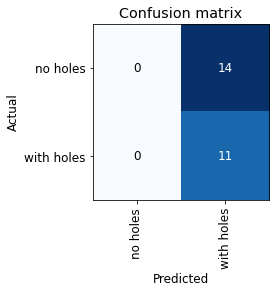

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

**Prediction/Actual/Loss/Probability**

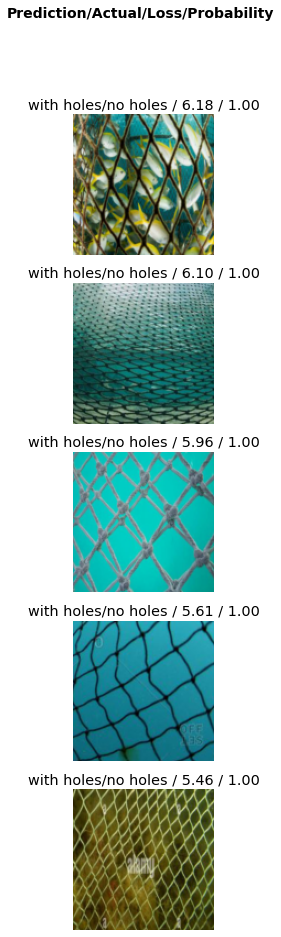

In [ ]:
interp.plot_top_losses(5, nrows=5)

**ImageClassifierCleaner**

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
#For deleting purposes
#for idx in cleaner.delete(): 
  #cleaner.fns[idx].unlink()
#For modifying
#for idx,cat in cleaner.change(): 
  #shutil.move(str(cleaner.fns[idx]), path/cat)

**Export Model**

In [ ]:
learn.export('/content/drive/MyDrive/Dataset/nets.pkl')

**Test Model**

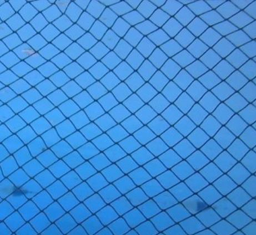

In [ ]:
im = Image.open('/content/Dataset/nets/no holes/net01.jpg')
im.to_thumb(256,256)

In [ ]:
learn.predict('/content/Dataset/nets/no holes/net06.jpg')

('with holes', TensorBase(1), TensorBase([0.0306, 0.9694]))

In [ ]:
is_nets,_,probs=learn.predict('/content/Dataset/nets/no holes/net01.jpg')
print(f"with holes or no holes?: {is_nets}")
print(f"Probability is: {probs[1].item():.6f}")

with holes or no holes?: with holes
Probability is: 0.982114


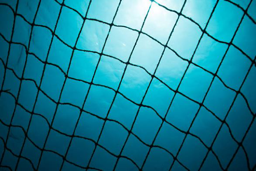

In [ ]:
im = Image.open('/content/Dataset/nets/no holes/net10.jpg')
im.to_thumb(256,256)

In [ ]:
is_nets,_,probs=learn.predict('/content/Dataset/nets/no holes/net10.jpg')
print(f"with holes or no holes?: {is_nets}")
print(f"Probability is: {probs[1].item():.6f}")

with holes or no holes?: with holes
Probability is: 0.841009


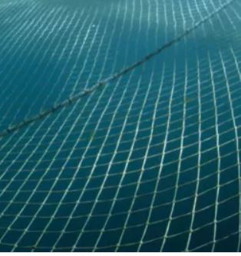

In [ ]:
im = Image.open('/content/Dataset/nets/no holes/net16.jpg')
im.to_thumb(256,256)

In [ ]:
is_nets,_,probs=learn.predict('/content/Dataset/nets/no holes/net16.jpg')
print(f"with holes or no holes?: {is_nets}")
print(f"Probability is: {probs[1].item():.6f}")

with holes or no holes?: with holes
Probability is: 0.987662


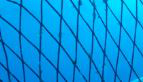

In [ ]:
im = Image.open('/content/Dataset/nets/no holes/net21.jpg')
im.to_thumb(256,256)

In [ ]:
is_nets,_,probs=learn.predict('/content/Dataset/nets/no holes/net21.jpg')
print(f"with holes or no holes?: {is_nets}")
print(f"Probability is: {probs[1].item():.6f}")

with holes or no holes?: with holes
Probability is: 0.926753


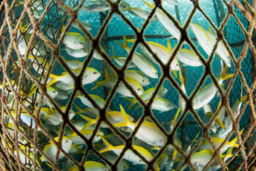

In [ ]:
im = Image.open('/content/Dataset/nets/no holes/net11.jpg')
im.to_thumb(256,256)

In [ ]:
is_nets,_,probs=learn.predict('/content/Dataset/nets/no holes/net11.jpg')
print(f"with holes or no holes?: {is_nets}")
print(f"Probability is: {probs[1].item():.6f}")

with holes or no holes?: with holes
Probability is: 0.997925


Test with holes classes


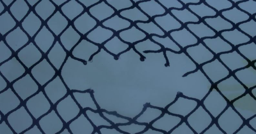

In [ ]:
im = Image.open('/content/Dataset/nets/with holes/Net26.jpg')
im.to_thumb(256,256)

In [ ]:
is_nets,_,probs=learn.predict('/content/Dataset/nets/with holes/Net26.jpg')
print(f"with holes or no holes?: {is_nets}")
print(f"Probability is: {probs[1].item():.6f}")

with holes or no holes?: with holes
Probability is: 0.999722


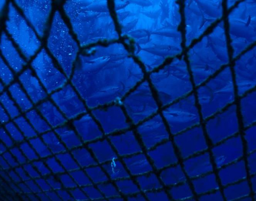

In [ ]:
im = Image.open('/content/Dataset/nets/with holes/Net27.jpg')
im.to_thumb(256,256)

In [ ]:
is_nets,_,probs=learn.predict('/content/Dataset/nets/with holes/Net27.jpg')
print(f"with holes or no holes?: {is_nets}")
print(f"Probability is: {probs[1].item():.6f}")

with holes or no holes?: with holes
Probability is: 0.981731


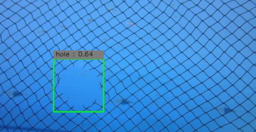

In [ ]:
im = Image.open('/content/Dataset/nets/with holes/Net28.jpg')
im.to_thumb(256,256)

In [ ]:
is_nets,_,probs=learn.predict('/content/Dataset/nets/with holes/Net28.jpg')
print(f"with holes or no holes?: {is_nets}")
print(f"Probability is: {probs[1].item():.6f}")

with holes or no holes?: with holes
Probability is: 0.999912


**Using PKL Model**

In [ ]:
learner = load_learner('/content/drive/MyDrive/Dataset/nets.pkl')

In [ ]:
is_nets,_,probs=learner.predict('/content/drive/MyDrive/Dataset/net01.jpg')
print(f"with holes or no holes?: {is_nets}")
print(f"Probability is: {probs[1].item():.6f}")

with holes or no holes?: with holes
Probability is: 0.982114


In [ ]:
is_nets,_,probs=learner.predict('/content/drive/MyDrive/Dataset/net02.jpg')
print(f"with holes or no holes?: {is_nets}")
print(f"Probability is: {probs[1].item():.6f}")

with holes or no holes?: with holes
Probability is: 0.994094
